#I. Intoduction

# II. Datasets 

## 1. Training data

### a. VGGFace2

Large-scale face dataset named VGGFace2 was released in 2016 to evaluate face recognition. It replaced The VGGFace dataset released in 2015 with 2.6 million images covering 2,622 people. The dataset contains 3.31 million images of 9131 subjects, with an average of 362.6 images for each subject and spanning a wide range of ethnicities, including more Chinese and Indian faces than VGGFace (though, the ethnic balance is still limited by the distribution of celebrities and public figures), and professions (e.g. politicians and athletes).  Images have been downloaded from Google Image Search and have large variations in pose, age, illumination, ethnicity and profession. The dataset is approximately gender-balanced, with 59.3% males, varying between 80 and 843 images for each identity.

Due to technical and time limitations we did a sample of 2055 identities splitting it up into two subsamples – for training (1644 identities, 80% of initial sample) and validation (411 identities, 20% of initial sample) purposes.


## 2. Validation Data

We evaluate all methods on two datasets  on the face verification task.

### a. Labeled Faces in the Wild (LFW)


 Labeled Faces in the Wild is a public benchmark for face verification, also known as pair matching, a database of face photographs designed for studying the problem of unconstrained face recognition.
The Labeled Faces in the Wild (LFW) database was published in 2007 and is described in a University of Massachusetts,  Amherst. The database was designed to study the specific task in which a pair of two face images are presented, and a classifier is required to classify the pair as either “same” or “different” depending upon whether the images picture the same person or not.
The data set contains more than 13,233 images of faces (5749 people ) collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector.


### b. Dataset of personal photos (FACES_DD)

FACES_DD dataset is a set of private photos taken between 2003 and 2009. It contains 925 high resolution photos (6 Mpix on average) with 2690 labeled faces. Among the faces 1205 faces for 10 identities are labeledd with personal initials twarzy. Initials and distribution is presented below:

AM': 11,
'AS': 6,
'BO': 24,
'DD': 186,
'KWD': 307,
'OO': 27,
'RO': 22,
'TM': 10,
'ZBD': 583,
'ZD': 29.

Not labeled with initials faces (1485 faces) were labeled as 'Other' and removed from the dataset.

# III. Evaluation metrics

We evaluate all methods on the face verification task. I.e.
given a pair of two face images a squared $L2$ distance threshold $D(x{_i}; x{_j})$ is used to determine the classification of same and different. All faces pairs $(i; j)$ of the same identity are denoted with $Psame$, whereas all pairs of different identities are denoted with $Pdiff$.


tp = predict: Psame, actual: Psame

fp = predict: Psame, actual: Pdiff

tn = predict: Pdiff, actual: Pdiff

fn = predict: Pdiff, actual: Psame


VAR = TPR (true positive rate) = tp/(tp+fn)

FAR= FPR (false positive rate) = fp/(fp+tn)

Accuracy = (tp+tn)/(tp+fp+tn+fn)

# IV. Models and methods review

## 1. FaceNet

### a. Introduction

It was introduced in 2015 by Florian Schroff, Dmitry Kalenichenko, James Philbin in their article "FaceNet: A Unified Embedding for Face Recognition and Clustering".
This method is based on learning a Euclidean embedding per image using a deep convolutional network. The network is trained such that the squared L2 distances in the embedding space directly correspond to face similarity: faces of the same person have small distances and faces of distinct people have large distances.
Once this embedding has been produced, then the aforementioned tasks become straight-forward: face verification simply involves thresholding the distance between the two embeddings; recognition becomes a k-NN classification problem; and clustering can be achieved using off-theshelf techniques such as k-means or agglomerative clustering.
FaceNet directly trains its output to be a compact embedding using a tripletbased loss function. The triplets consist of two matching face thumbnails and a non-matching face thumbnail and the loss aims to separate the positive pair from the negative by a distance margin. 


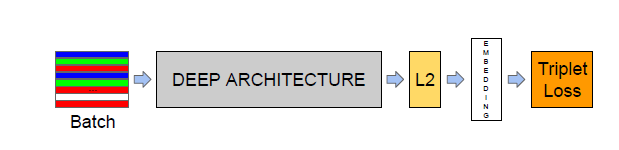

### b. Triplet Loss

The embedding is represented by $f(x)  ∈ {R^d}$. It embeds an image x into a $d$-dimensional Euclidean space. Additionally, we constrain this embedding to live on the $d$-dimensional hypersphere, i.e. $||f(x)||{_2}$ = 1. 

Here one want to ensure that an image $x{^a_i}(anchor)$ of
a specific person is closer to all other images $x{^p_i}(positive)$
of the same person than it is to any image $x{^n_i}(negative)$ of any other person.


The loss that is being minimized is then L, where $alpha$ is a margin that is enforced between positive and negative pairs.

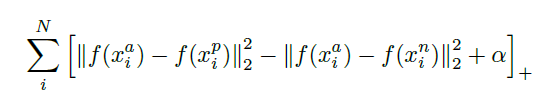

### c. Triples selection / hardbatch

Generating all possible triplets would result in many triplets that are easily satisfied. These triplets would not contribute to the training and result in slower convergence, as they would still be passed through the network. It is crucial to select hard triplets, that are active and can therefore contribute to improving the model.

In order to ensure fast convergence it is crucial to select triplets that violate the triplet constraint. This means that, given $x{^a_i}$
, to select an $x{^p_i}(hard positive)$ such that $argmax{_x{^p_i}}||f(x{^a_i})-f(x{^p_i})||{^2_2}$ and similarly $x{^n_i}(hard negative)$ such that $argmin{_x{^p_i}}||f(x{^a_i})-f(x{^n_i})||{^2_2}$

It is infeasible to compute the argmin and argmax across the whole training set. Additionally, it might lead to poor training, as mislabelled and poorly imaged faces would dominate the hard positives and negatives. There are two obvious choices that avoid this issue: generate triplets offline every n steps, using the most recent network checkpoint and computing the argmin and argmax on a subset of the data; generate triplets online. This can be done by selecting
the hard positive/negative exemplars from within a mini-batch.

### d. Experiments

They use all anchorpositive pairs in a mini-batch while still selecting the hard negatives. FaceNet uses a deep convolutional network, two different core architectures: The Zeiler&Fergus style networks and the recent Inception type network. They evaluate this model on LFW.


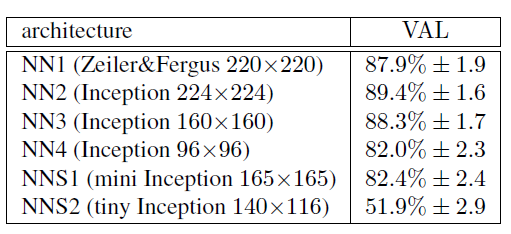

### e. Implementation: Inception resnet v1

https://github.com/timesler/facenet-pytorch: This is a repository for Inception Resnet (V1) models in pytorch, pretrained on VGGFace2 and CASIA-Webface.

Pytorch model weights were initialized using parameters ported from David Sandberg's tensorflow facenet repo.
https://github.com/davidsandberg/facenet?fbclid=IwAR3OrgYj97eDRTLFZrjfN84-IqqkkjgxDimXTipIGOjGO0DmG9V_70fMrKY

This is a TensorFlow implementation of the face recognizer described in the  paper "FaceNet: A Unified Embedding for Face Recognition and Clustering". 
Training data: The CASIA-WebFace dataset has been used for training. This training set consists of total of 453 453 images over 10 575 identities after face detection. Some performance improvement has been seen if the dataset has been filtered before training. Some more information about how this was done will come later. The best performing model has been trained on the VGGFace2 dataset consisting of ~3.3M faces and ~9000 classes. Currently, the best results are achieved by training the model using softmax loss. 

The accuracy on LFW for the model trained on VGGFace2 is 0.99650+-0.00252. 




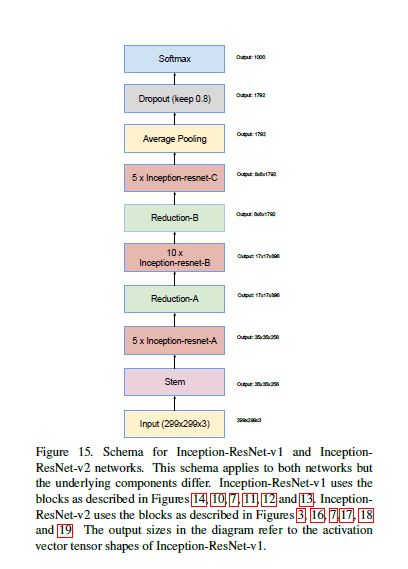

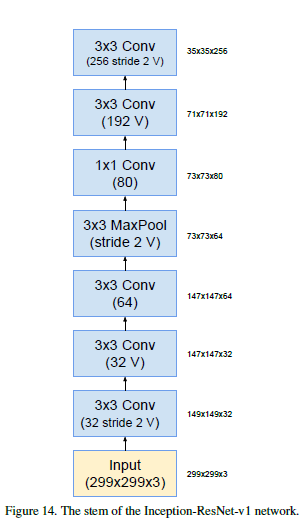

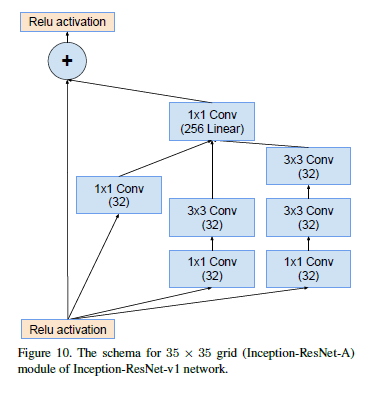

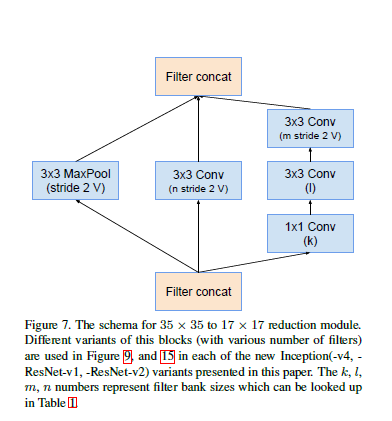

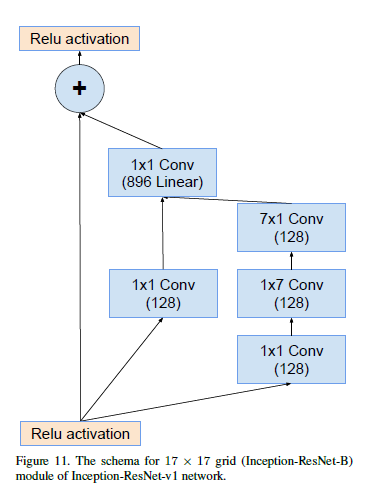

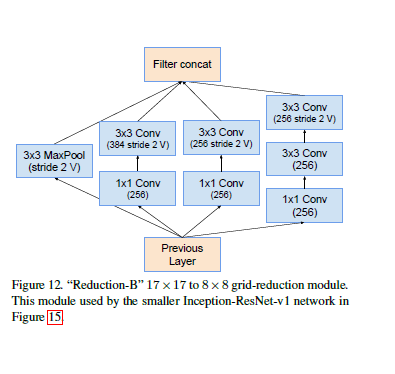

## 2. MobileFaceNet

### a. Introduction

MobileFaceNet uses less than 1 million parameters and is specifically tailored for high-accuracy real-time face verification on mobile and embedded devices. It was introduced in 2018 by Sheng Chen, Yang Liu, Xiang Gao and Zhen Han in their article "MobileFaceNets: Efficient CNNs for Accurate RealTime Face Verification on Mobile Devices" where they presented a class of efficient CNN models - MobileFaceNets. Proposed models were developmnets of known in that time efficient neural networks e.g. MobileNetV1, ShuffleNet and MobileNetV2 for common visual
recognition tasks rather than face verification. Presented MobileFaceNets use less than 1 million parameters and under the same
experimental conditions achieve significantly better accuracy
as well as more than 2 times actual speedup over MobileNetV2.

### b. Features Maps and Average Pooling

Global average pooling layer was widely used in most recent state-of-the-art mobile networks proposed for common visual recognition tasks (e.g. MobileNetV1, ShuffleNet, MobileNetV2). But for face verification and recognition, it was observed that CNNs with global average pooling layers are less accurate than those without global average pooling. 

\
Conception of Features Map (FMap) was widely used in the models. Figure presents a typical face feature embedding CNN architecture and the receptive field (RF). The last 7x7 feature map is denoted as FMap. RF1 and RF2 correspond to the corner unit and the center unit in
FMap respectively. The corner unit should be of less importance than the center unit.

\
Figure.
\
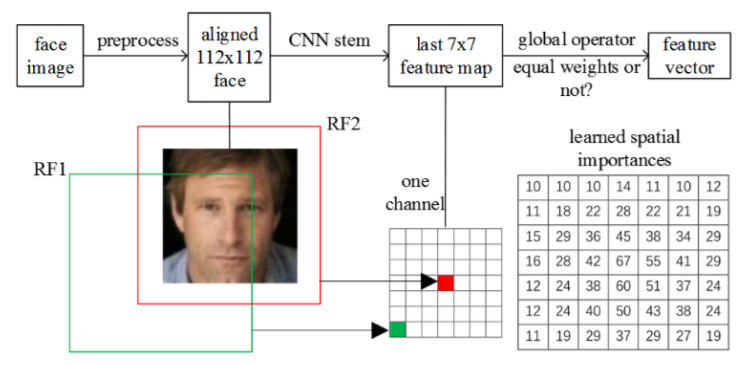


### c. Architecture

The residual bottlenecks proposed in MobileNetV2 are used as main building blocks. The detailed structure of our MobileFaceNet architecture is shown in Table 1. Particularly, expansion
factors for bottlenecks in our architecture are much smaller than those in MobileNetV2. PReLU is used as the non-linearity, which turns of slightly better for face verification than using ReLU. In addition, a fast downsampling strategy at the beginning of the network is used. An early dimension-reduction at the last several convolutional layers and a linear 1 × 1 convolution layer following a linear global depthwise convolution layer as the feature output layer are applied. Batch normalization is utilized during training. The first layer of each sequence has a stride s (see Table) and all others use stride 1. All spatial convolutions in the bottlenecks use 3 × 3 kernels. The expansion factor t (see Table) is always applied to the input size. GDConv7x7 denotes GDConv (Global Depthwise Convolution
) layer of 7 × 7 kernels.

Table 1.
\
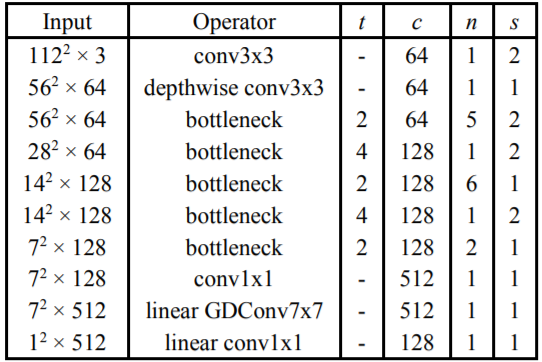



In order to treat different units of FMaps with different importance, the global average pooling layer was replaced with a global depthwise convolution layer. The layer is a depthwise convolution layer with kernel size equaling the input size, padding equaling to 0 and stride equaling to 1. The output for global depthwise convolution layer is given by the forluma below:


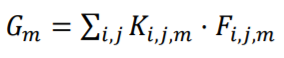

where $F$ is the input feature map of size $𝑊×𝐻×𝑀$, $𝐾$ is the depthwise convolution kernel of size $𝑊×𝐻×𝑀$, $𝐺$ is the output of size $1 × 1 × 𝑀$ the $𝑚-𝑡ℎ$ channel in $𝐺$ has only one element ${G_m}$, $(𝑖,𝑗)$ denotes the spatial position in $F$ and $𝐾$, and $𝑚$ denotes the channel index.

### d. Additive Angular Margin Loss (ArcFace)

Additive Angular Margin Loss (ArcFace) is a method proposed in 2019 by Jiankang Deng, Jia Guo, Niannan Xueto and Stefanos Zafeiriou in the article "ArcFace: Additive Angular Margin Loss for Deep Face Recognition"$ in order to obtain highly discriminative features for face recognition problem - one of the main challenges in feature learning using Deep Convolutional Neural Networks (DCNNs) for largescale face recognition.




ArcFace method was directly formulated from the most widely used in deep face recognition classification loss function - soft-max loss - given by the formula below:

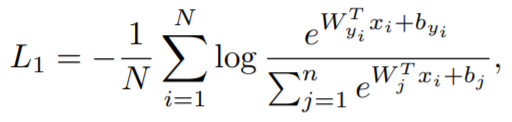 (1)

where ${x_i}$ ∈ ${R_d}$ denotes the deep feature of the $i-th$ sample, belonging to the ${y_i-th}$ class. ${W_j}$ ∈ ${R_d}$ denotes the $j-th$ column of the weight $W$ ∈ $R^{d×n}$ and ${b_j}$ ∈ $R^{n}$ is the bias term. The batch size and the class number are $N$ and $n$, respectively. The soft-max loss function does not explicitly optimize the feature embedding to enforce higher similarity for intraclass samples and diversity for inter-class samples. It results in a performance gap for deep face recognition under large intra-class appearance variations. 

Fixing the bias ${b_j} = 0$ and transforming the logit as ${W^T}$j ${x_i}$ = ||${W_j}$|| ||${x_i}$ * $\cos({θ_j})$, where ${θ_j}$ is the angle between the weight ${W_j}$ and the feature ${x_i}$. The individual weight is fixed to ||${W_j}$|| $= 1$ by $l2$ normalization and the embedding feature is fixed to ||${x_i}$|| by $l2$ normalization and was re-scaled it to $s$. The normalization step on features and weights makes the predictions only depend on the angle between the feature and the weight. The learned embedding features are distributed on a hypersphere with a radius of $s$ what is presented by the formula below:

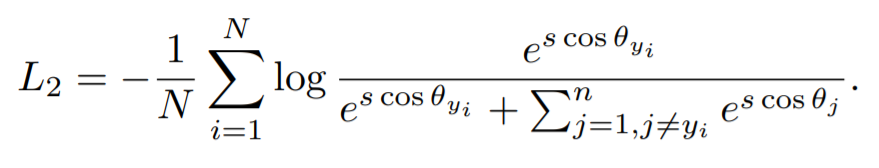 (2)

Due to the fact that the embedding features are distributed around each
feature centre on the hypersphere, an additive angular margin penalty $m$ between ${x_i}$ and ${W_yi}$ to simultaneously enhance the intra-class compactness and inter-class discrepancy are added. Final formula for ArcFace loss function is given below:

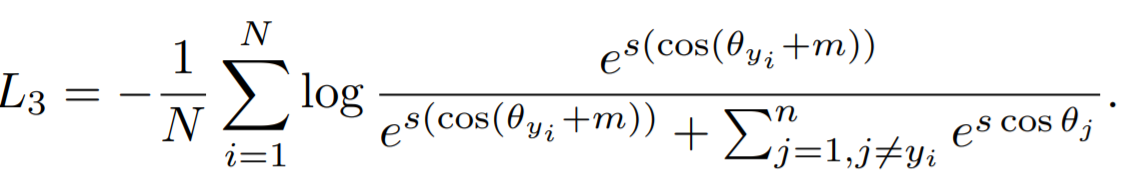 (3)

### e. Experiments and model performance

All tested by the authors MobileFaceNet models and baseline models were trained on CASIA-Webface dataset from scratch by ArcFace loss. In addition, weight decay parameter was set to 4e-5, except the weight decay parameter of the last layers after the global operator (GDConv or GAPool) being set to 4e-4. SGD with momentum 0.9 to optimize models and the batch size is 512 were used. The learning rate begun with 0.1 and was divided by 10 at the 36K, 52K and 58K iterations. The training was finished at 60K iterations. The face
verification accuracy on LFW and AgeDB-30 is compared in Table 2. 

Table 2.
\
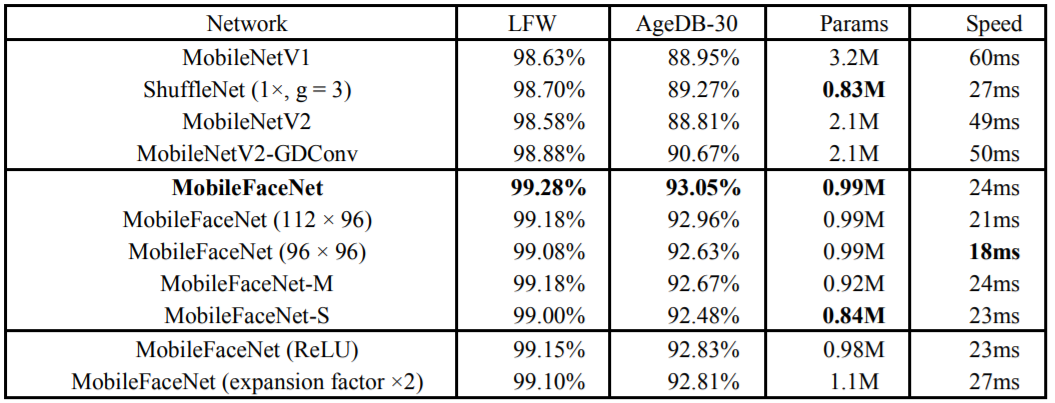





# V. Experimental research

### 1. Experiment backgroud

Main goal of our experiment was to investigate an impact of deep learing metrics on chosen evaluation metrics. Other words, we claim that Triplet Loss function is more relevant for face recognition tasks on large scale databases than common Softmax function or even ArcFace method. 

In order to prove our claim, Triplet Loss and HardBatch approach were applied for train models after transfer learning. 


<!-- 1. 3 pretrained model on LFW and on Faces DD
2. mobilefacenet with TripleLoss and HardBatch -->

### 2. Results


$\begin{array}{c|c|c|c|c}
model & data & accuracy & TPR & FPR & flops\\
\hline
pretrained\ Inception\ resnet\ v1\ (vggface2)& LFW & 99.94\% & 84.52\%  & 0.02\% & xx\\
pretrained\ Inception\ resnet\ v1\ (casia)& LFW & xx\% & xx\% & xx\% & xx\\
pretrained\ MobileFaceNet& LFW & 99.93\% &  81.18\% & 0.02\% & xx\\
\hline
trained\ Inception\ resnet\ v1\ ()& LFW & xx\% & xx\% & xx\% & xx\\
trained\ with\ TripleLoss\ and\ hardbatch\ MobileFaceNet& LFW & 99.94\% &  81.89\% & 0.01\% & xx\\
\hline
pretrained\ Inception\ resnet\ v1\ (vggface2) & FacesDD & 90.05\% & 77.58\% & 4.00\%  & xx\\
pretrained\ Inception\ resnet\ v1\ (casia) & FacesDD & 89.43\% & 77.79\% &  5.01\% & xx\\
pretrained\ MobileFaceNet    & FacesDD & 81.88\% & 63.87\% & 9.54\% & xx\\
\hline
trained\ Inception\ resnet\ v1& FacesDD & 89.43\% & 77.79\% &  5.01\% & xx\\
trained\ with\ TripleLoss\ and\ hardbatch\ MobileFaceNet& FacesDD & 84.22\% &  66.21\% & 7.19\% & xx\\
\hline
\end{array}$

#Bibliography/References

[1] Florian Schroff, Dmitry Kalenichenko, James Philbin. FaceNet: A Unified Embedding for Face Recognition and Clustering". 2015.

[2] C. Szegedy, W. Liu, Y. Jia, P. Sermanet, S. Reed, D. Anguelov, D. Erhan, V. Vanhoucke, and A. Rabinovich. Going deeper with convolutions.

[3] Christian Szegedy, Sergey Ioffe, Vincent Vanhoucke, Alex Alemi. Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning. 2016.

[4] Sheng Chen, Yang Liu, Xiang Gao, and Zhen Han. MobileFaceNets: Efficient CNNs for Accurate Real-Time Face Verification on Mobile Devices.

[5] https://github.com/davidsandberg/facenet

[6] https://github.com/timesler/facenet-pytorch

[7] https://github.com/tbmoon/facenet

[8] http://vis-www.cs.umass.edu/lfw/
